<a href="https://colab.research.google.com/github/gmnvh/ai/blob/main/Tensor_Flow_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with TensorFlow

Objective for this Notebook
1. What is different between Linear and Logistic Regression?
2. Utilizing Logistic Regression in TensorFlow. 
3. Training the model

---

## What is different between Linear and Logistic Regression?
While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class in which an observed data point belongs. In order to provide estimate for classification, we need some sort of guidance on what would be the most probable class for that data point. For this, we use Logistic Regression.

> Recall linear regression:
>
> Linear regression finds a function that relates a continuous dependent variable, y, to some predictors (independent variables x1, x2, etc.).Simple linear regression assumes a function of the form:
>
> $𝑦=𝑤0+𝑤1×𝑥1+𝑤2×𝑥2+⋯$
> 
>and finds the values of w0, w1, w2, etc. The term w0 is the "intercept" or "constant term" (it's shown as b in the formula below):
>
> $𝑌=𝑊𝑋+𝑏$
 
Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic regression, it is actually a probabilistic classification model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦𝑂𝑓𝑎𝐶𝑙𝑎𝑠𝑠=𝑡ℎ𝑒𝑡𝑎(𝑦)=𝑒𝑦1+𝑒𝑦=𝑒𝑥𝑝(𝑦)/(1+𝑒𝑥𝑝(𝑦))=𝑝$

which produces p-values between 0 (as y approaches minus infinity−𝑖𝑛𝑓𝑡𝑦) and 1 (as y approaches plus infinity  +∞ ). This now becomes a special kind of non-linear regression.

In this equation, y is the regression result (the sum of the variables weighted by the coefficients), exp is the exponential function and𝑡ℎ𝑒𝑡𝑎(𝑦)is the logistic function, also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modeling population growth.

You might also have seen this function before, in another configuration:

$𝑃𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦𝑂𝑓𝑎𝐶𝑙𝑎𝑠𝑠=𝑡ℎ𝑒𝑡𝑎(𝑦)=11+𝑒−𝑦$

So, briefly, Logistic Regression passes the input through the logistic/sigmoid function but then treats the result as a probability:

![lr](https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png)

---

## Utilizing Logistic Regression in TensorFlow

For us to utilize Logistic Regression in TensorFlow, we first need to import the required libraries. To do so, you can run the code cell below.

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Next, we will load the dataset we are going to use. In this case, we are utilizing the iris dataset, which is inbuilt -- so there's no need to do any preprocessing and we can jump right into manipulating it. We separate the dataset into xs and ys, and then into training xs and ys and testing xs and ys, (pseudo)randomly.

## Understanding the Data
Iris Dataset:

This dataset was introduced by British Statistician and Biologist Ronald Fisher, it consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). In total it has 150 records under five attributes - petal length, petal width, sepal length, sepal width and species.

Attributes Independent Variable

* petal length
* petal width
* sepal length
* sepal width

Dependent Variable
* Species
  * Iris setosa
  * Iris virginica
  * Iris versicolor

In [19]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

Now we define x and y. These variables will hold our iris data (both the features and label matrices) We also need to give them shapes which correspond to the shape of our data.

In [20]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]
print('numFeatures is : ', numFeatures )
# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]
print('numLabels is : ', numLabels )

#X = tf.Variable( np.identity(numFeatures), tf.TensorShape(numFeatures),dtype='float32') # Iris has 4 features, so X is a tensor to hold our data.
#yGold = tf.Variable(np.array([1,1,1]),shape=tf.TensorShape(numLabels),dtype='float32') # This will be our correct answers matrix for 3 classes.

numFeatures is :  4
numLabels is :  3


In [21]:
trainX = tf.constant(trainX, dtype='float32')
trainY = tf.constant(trainY, dtype='float32')
testX = tf.constant(testX, dtype='float32')
testY = tf.constant(testY, dtype='float32')

## Set model weights and bias

Much like Linear Regression, we need a shared variable weight matrix for Logistic Regression. We initialize both W and b as tensors full of zeros. Since we are going to learn W and b, their initial value does not matter too much. These variables are the objects which define the structure of our regression model, and we can save them after they have been trained so we can reuse them later.

We define two TensorFlow variables as our parameters. These variables will hold the weights and biases of our logistic regression and they will be continually updated during training.

Notice that W has a shape of [4, 3] because we want to multiply the 4-dimensional input vectors by it to produce 3-dimensional vectors of evidence for the difference classes. b has a shape of [3] so we can add it to the output. TensorFlow variables need to be initialized with values, e.g. with zeros.

In [22]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [23]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random.normal([numFeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))

## Logistic Regression model

We now define our operations in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

$ŷ=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑊𝑋+𝑏)$
 
However, for the sake of clarity, we can have it broken into its three main components:

* a weight times features matrix multiplication operation,
* a summation of the weighted features and a bias term,
* and finally the application of a sigmoid function.

As such, you will find these components defined as three separate operations below.

In [24]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

As we have seen before, the function we are going to use is the logistic function(𝑓𝑟𝑎𝑐11+𝑒−𝑊𝑥), which is fed the input data after applying weights and bias. In TensorFlow, this function is implemented as the nn.sigmoid function. Effectively, this fits the weighted input with bias into a 0-100 percent curve, which is the probability function we want.

---


## Training
The learning algorithm is how we search for the best weight vector ( 𝑏𝑓𝑤 ). This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.

What tell us our model is bad?
The Cost or Loss of the model, so what we want is to minimize that.

## Cost function
Before defining our cost function, we need to define how long we are going to train and how should we define the learning rate.

In [25]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0008,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

What is the cost function in our model?
The cost function we are going to utilize is the Squared Mean Error loss function.

How to minimize the cost function?
We can't use least-squares linear regression here, so we will use gradient descent instead. Specifically, we will use batch gradient descent which calculates the gradient from all data points in the data set.

In [26]:
#Defining our cost function - Squared Mean Error
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
optimizer = tf.keras.optimizers.SGD(learningRate)

We also want some additional operations to keep track of our model's efficiency over time. We can do this like so:

In [27]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

we first wrap computation inside a GradientTape for automatic differentiation. Then we compute gradients and update W and b.

In [28]:
# Optimization process. 

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_object(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

Now we move on to actually running our operations. We will start with the operations involved in the prediction phase (i.e. the logistic regression itself).

Now we can define and run the actual training loop, like this:

In [29]:
# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(trainX, trainY)
        
        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            
            pred = logistic_regression(testX)

            newLoss = loss_object(pred, testY)
            # Add loss to live graphing variable
            loss_values.append(newLoss)
            
            # Generate accuracy stats on test data
            acc = accuracy(pred, testY)
            accuracy_values.append(acc)
            
    
            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))

        

          

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())

step 0, training accuracy 0.3, loss 0.140862, change in loss 0.140862
step 10, training accuracy 0.3, loss 0.14021, change in loss 0.000651449
step 20, training accuracy 0.3, loss 0.139567, change in loss 0.000643104
step 30, training accuracy 0.3, loss 0.138932, change in loss 0.000634715
step 40, training accuracy 0.3, loss 0.138306, change in loss 0.000626266
step 50, training accuracy 0.3, loss 0.137688, change in loss 0.000617787
step 60, training accuracy 0.3, loss 0.137079, change in loss 0.000609308
step 70, training accuracy 0.3, loss 0.136478, change in loss 0.00060077
step 80, training accuracy 0.3, loss 0.135886, change in loss 0.000592262
step 90, training accuracy 0.3, loss 0.135302, change in loss 0.000583738
step 100, training accuracy 0.3, loss 0.134733, change in loss 0.000569507
step 110, training accuracy 0.3, loss 0.134194, change in loss 0.000538617
step 120, training accuracy 0.3, loss 0.133663, change in loss 0.000530958
step 130, training accuracy 0.3, loss 0.1

Why don't we plot the loss to see how it behaves?

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


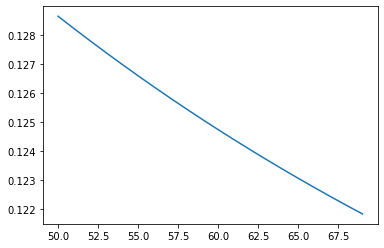

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(loss_values[i-50:i]) for i in range(len(loss_values))])
plt.show()

Try changing the parameters such as the length of training, and maybe some operations to see how the model behaves. Does it take much longer? How is the performance?

---
